# Lab02: Gradient Descent.

- Student ID: 18127198
- Student name: Lê Quang Bảo Sơn

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle (**recommended compression format: zip**).

**Contents:**
- Gradient descent.

**Notes that**: this lab is prepared based on the book "Deep Learning for Computer Vision with Python" by Adrian Rosebrock.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1/(1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    s=sigmoid_activation(x)
    ds=s*(1-s)
    return ds


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    h=sigmoid_activation(X.dot(W))
    return h
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = sigmoid_activation(X.dot(W))

    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient=trainX.T.dot(error)
   
    return gradient

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        #h=predict(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=30.7517263
Epoch=5, loss=4.8068736
Epoch=10, loss=2.5005190
Epoch=15, loss=1.5469669
Epoch=20, loss=1.2209903
Epoch=25, loss=1.1259539
Epoch=30, loss=1.0800920
Epoch=35, loss=1.0633499
Epoch=40, loss=1.0868813
Epoch=45, loss=1.1103653
Epoch=50, loss=1.1159220
Epoch=55, loss=1.1146410
Epoch=60, loss=1.1117629
Epoch=65, loss=1.1086762
Epoch=70, loss=1.1056974
Epoch=75, loss=1.1028858
Epoch=80, loss=1.1002413
Epoch=85, loss=1.0977512
Epoch=90, loss=1.0954009
Epoch=95, loss=1.0931760
Epoch=100, loss=1.0910632


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**TODO: Study about accuracy, recall, precision, f1-score.**
+ Conceptual explanation:
    - True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.\n
    - True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.\n
    - False Positives (FP) – When actual class is no and predicted class is yes.\n
    - False Negatives (FN) – When actual class is yes but predicted class in no.\n
+ F1:The F1 Score is the weighted average (or harmonic mean) of Precision and Recall. Therefore, this score takes both False Positives and False Negatives into account to strike a balance between precision and Recall.\n",
    - F1 Score = 2*(Recall * Precision) / (Recall + Precision)
+ Recall:Recall is the ratio of system generated results that correctly predicted positive observations (True Positives) to all observations in the actual malignant class (Actual Positives).\n",
    - Recall = TP/TP+FN
+ Precision:Precision is the ratio of system generated results that correctly predicted positive observations (True Positives) to the system’s total predicted positive observations, both correct (True Positives) and incorrect (False Positives).\n",
    - Precision = TP/TP+FP
+ Accuracy: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations
    - Accuracy = TP+TN/TP+FP+FN+TN


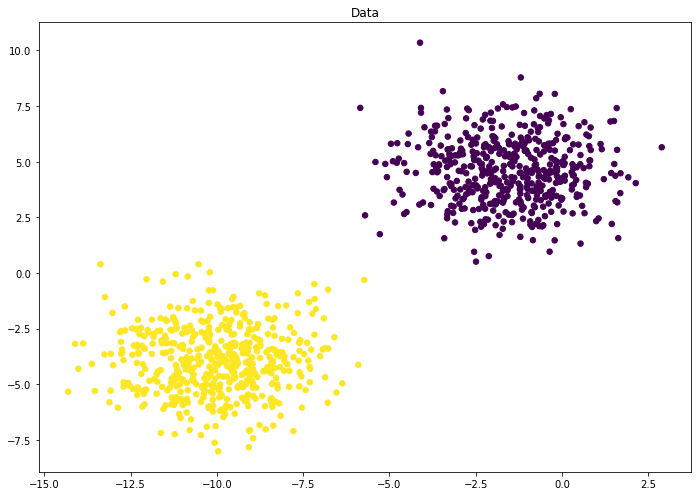

In [10]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

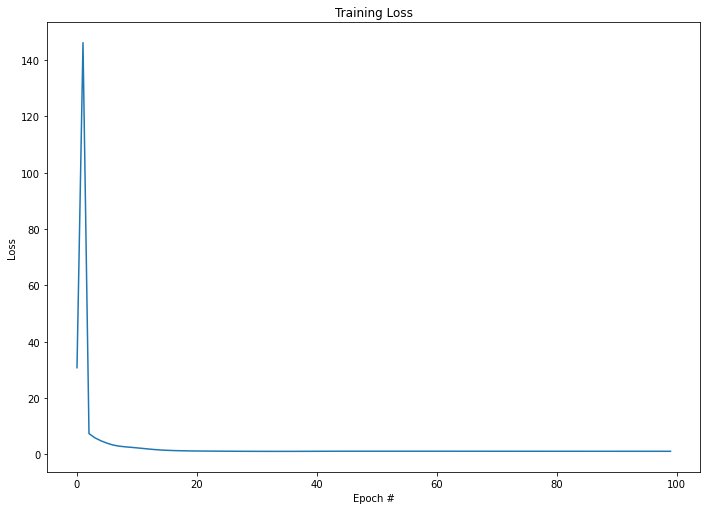

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observations**

with learning rate =0.02 -> 0.05
figure not change a lot